# Sales Performance Dashboard
This notebook performs basic exploratory analysis on the Superstore dataset.
Put `Superstore.csv` into the `data/` folder before running.

Rows, columns: (9994, 21)

Sales by Region:


Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

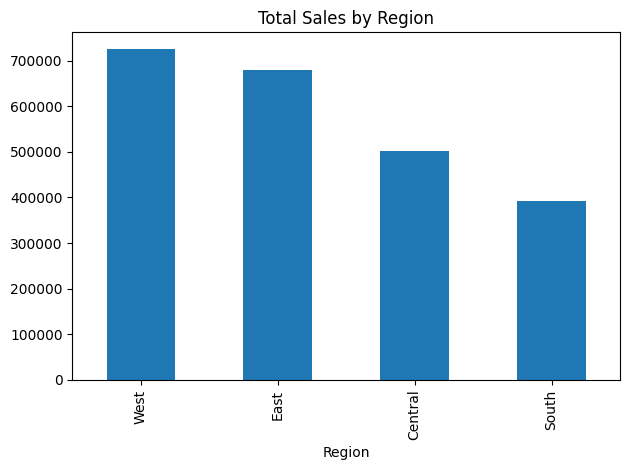


Top 10 Products by Sales:


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


Top 10 Customers by Revenue:


Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('data/Sample - Superstore.csv', encoding='latin1', low_memory=False)

# Quick look
print('Rows, columns:', df.shape)
df.head()

# Clean: drop exact duplicate rows
df = df.drop_duplicates()

# Convert Order Date to datetime (if column exists)
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sales by Region
if 'Region' in df.columns and 'Sales' in df.columns:
    region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    print('\nSales by Region:')
    display(region_sales)
    region_sales.plot(kind='bar');
    plt.title('Total Sales by Region');
    plt.tight_layout();
    plt.show()

# Top products by sales
if 'Product Name' in df.columns:
    top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
    print('\nTop 10 Products by Sales:')
    display(top_products)

# Top customers by revenue
if 'Customer Name' in df.columns:
    top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
    print('\nTop 10 Customers by Revenue:')
    display(top_customers)
